<a href="https://colab.research.google.com/github/ayonbiswas/ECE-143/blob/main/data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt   
import scipy.stats               
from sklearn import preprocessing
import plotly.express as px
import os

In [ ]:
url = 'https://raw.githubusercontent.com/ayonbiswas/ECE-143/main/Dataset/cereal.csv'
df = pd.read_csv(url)


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
from google.colab import files


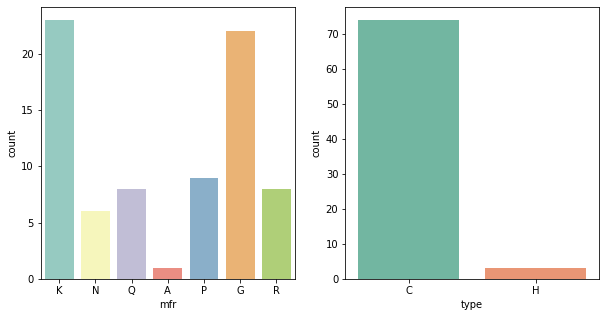

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x="mfr", data=df, ax=axes[0], palette="Set3")
sns.countplot(x="type", data=df, ax=axes[1], palette="Set2")
plt.savefig("/content/drivecount.png", dpi = 150)
# files.download( "data/count.png" ) 

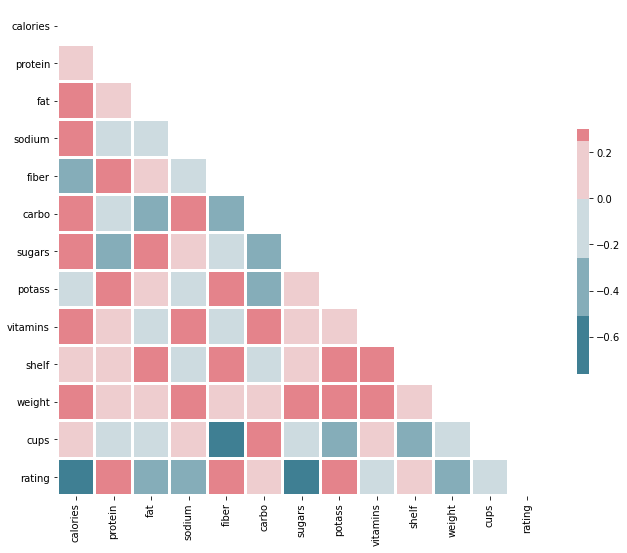

In [ ]:

corr=df.iloc[:,~df.columns.isin(['name','mfr','type'])].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10)
# with sns.axes_style("white"):

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=2, cbar_kws={"shrink": .5})
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr, vmax=.3, square=True, annot=True, linewidths=3)

plt.savefig("/content/corr.png", dpi = 150)

Calories have notable positive correlations with weight, sugars and fat.
Strong negative correlations between sugars and rating, and calories and rating.

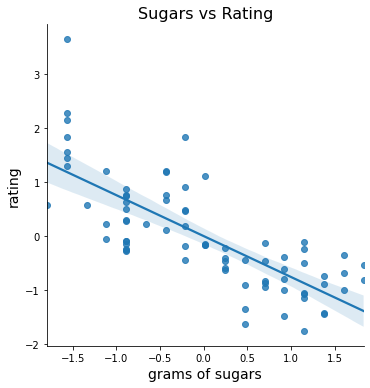

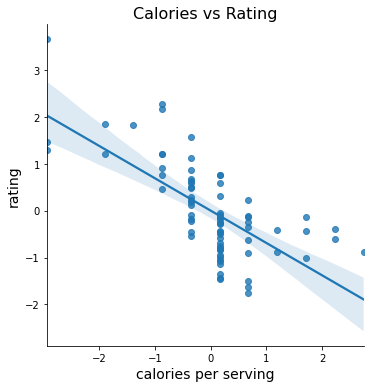

In [ ]:
# f, axes = plt.subplots(1,2, figsize=(10, 5))
sns.lmplot(x="sugars",y="rating",data=df)
plt.title('Sugars vs Rating', size= 16)
plt.xlabel("grams of sugars", size = 14)
plt.ylabel("rating", size =14)
plt.savefig("/content/sugar_rating.png", dpi = 150, bbox_inches='tight')

sns.lmplot(x="calories", y="rating", data=df)
plt.title('Calories vs Rating', size=16)
plt.ylabel("rating", size = 14)
plt.xlabel("calories per serving", size =14)
plt.savefig("/content/calories_rating.png", dpi = 150, bbox_inches='tight')
# sns.jointplot(x="calories", y="rating", data=df)


cereals with high calories or sugar are less preferred.

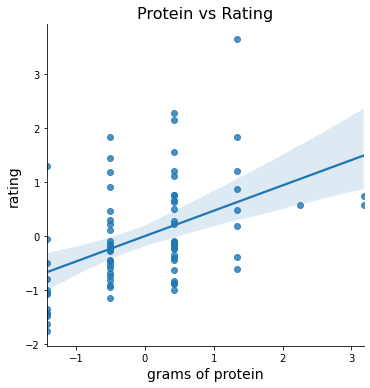

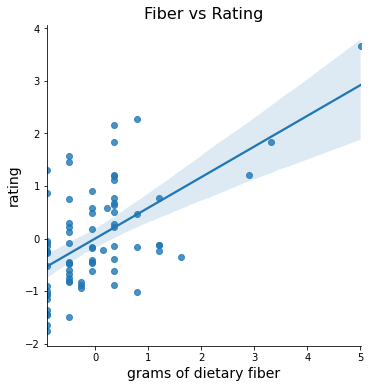

In [ ]:
sns.lmplot(x="protein", y="rating", data=df)
plt.title('Protein vs Rating', size= 16)
plt.xlabel("grams of protein", size = 14)
plt.ylabel("rating", size =14)
plt.savefig("/content/protein_rating.png", dpi = 150, bbox_inches='tight')

sns.lmplot(x="fiber", y="rating", data=df)
plt.title('Fiber vs Rating', size= 16)
plt.xlabel("grams of dietary fiber", size = 14)
plt.ylabel("rating", size =14)
plt.savefig("/content/fiber_rating.png", dpi = 150, bbox_inches='tight')
# sns.lmplot(x="vitamins", y="rating", data=df)

health is preferred over taste by customers in general


# comparing good vs bad



In [ ]:
cereals_scale = df

scaler = preprocessing.StandardScaler()
columns =df.columns[3:]
cereals_scale[columns] = scaler.fit_transform(cereals_scale[columns])
cereals_scale.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,All-Bran with Extra Fiber,K,C,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0.957813,-0.198067,-1.388576,3.657211
1,Shredded Wheat 'n'Bran,N,C,-0.872189,0.417912,-1.013072,-1.917189,0.780481,1.035642,-1.567525,0.620172,-1.27255,-1.460273,-0.198067,-0.653283,2.279146
2,Shredded Wheat spoon size,N,C,-0.872189,0.417912,-1.013072,-1.917189,0.358155,1.270876,-1.567525,0.337776,-1.27255,-1.460273,-0.198067,-0.653283,2.159399
3,100% Bran,N,C,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0.957813,-0.198067,-2.123870,1.844202
4,Shredded Wheat,N,C,-1.388793,-0.501495,-1.013072,-1.917189,0.358155,0.329939,-1.567525,-0.015220,-1.27255,-1.460273,-1.335218,0.774053,1.832229


In [ ]:

cereals_scale['Good'] = cereals_scale.loc[:,['protein','fiber','vitamins']].mean(axis=1)

cereals_scale['Bad'] = cereals_scale.loc[:,['fat','sodium','potass', 'sugars']].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



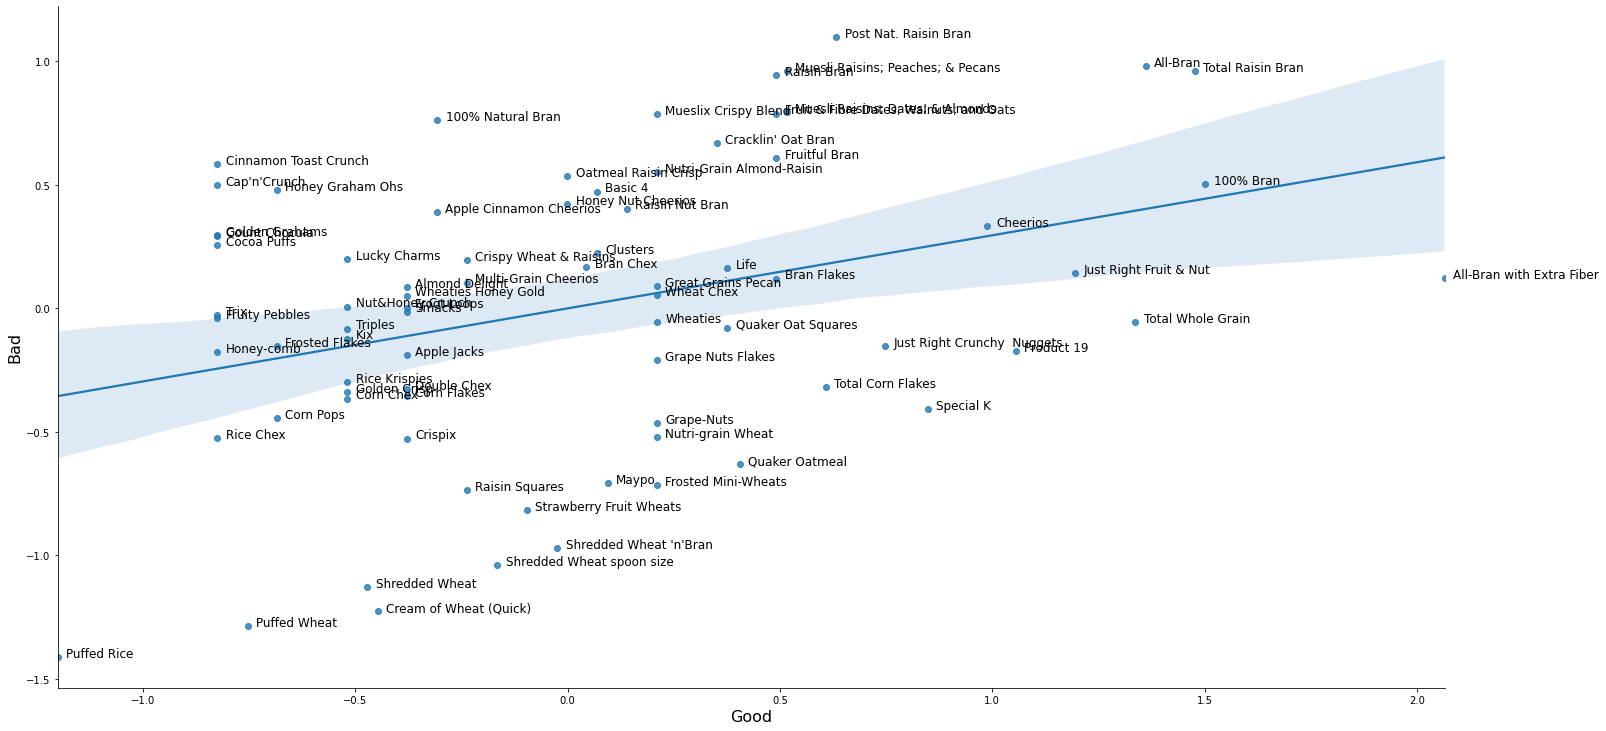

In [ ]:
ax = sns.lmplot('Good', 
           'Bad',
           data=cereals_scale, 
           fit_reg=True,
           height = 10,
           aspect =2 )

# plt.title('Cereals Plot')
plt.xlabel('Good', size = 16)
plt.ylabel('Bad', size =16)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
          ax.text(point['x']+.02, point['y'], str(point['val']), size = 12)

label_point(cereals_scale.Good, cereals_scale.Bad, cereals_scale.name, plt.gca()) 

plt.savefig("/content/good_bad.png", dpi = 150, bbox_inches='tight')

Zongcheng Wang👇

# Can type of cereal (hot or cold) affect rating?

my reference https://www.kaggle.com/kianwee/analysis-on-cereal-prediction-on-ratings




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def overview():
    
    url = 'https://raw.githubusercontent.com/ayonbiswas/ECE-143/main/cereal.csv'
    data = pd.read_csv(url)
    
#     data = pd.read_csv("../input/80-cereals/cereal.csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data
    
data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  ...  weight  cups     rating
0                   100% Bran   N    C  ...     1.0  0.33  68.402973
1           100% Natural Bran   Q    C  ...     1.0  1.00  33.983679
2                    All-Bran   K    C  ...     1.0  0.33  59.425505
3   All-Bran with Extra Fiber   K    C  ...     1.0  0.50  93.704912
4              Almond Delight   R    C  ...     1.0  0.75  34.384843
..                        ...  ..  ...  ...     ...   ...        ...
72                    Triples   G    C  ...     1.0  0.75  39.106174
73                       Trix   G    C  ...     1.0  1.00  27.753301
74                 Wheat Chex   R    C  ...     1.0  0.67  49.787445
75                   Wheaties   G    C  ...     1.0  1.00  51.592193
76        Wheaties Honey Gold   G    C  ...     1.0  0.75  36.187559

[77 rows x 16 columns]>



Dataset has 77 rows and 16 columns



Datatype: 

name         object
mfr          

In [ ]:
# Count the number of -1 in carbo, sugars and potass column
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# Count the number of -1 in carbo, sugars and potass column
data[data == -1].count(axis=0)

# Remove affected rows
data = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# Counting number of manufacturers 
data['mfr'].value_counts()

K    23
G    22
P     9
R     7
Q     7
N     5
A     1
Name: mfr, dtype: int64

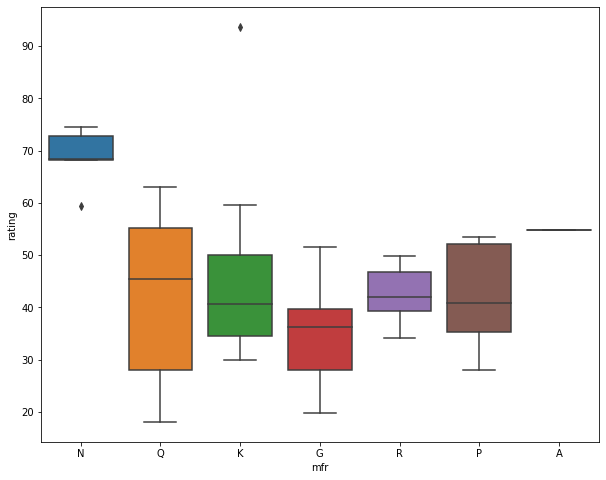

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = "mfr", y = "rating")

In [ ]:
# Best rating cereal
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


# Can macronutrients and calories affect ratings?

Text(0.5, 0, 'grams per serving')

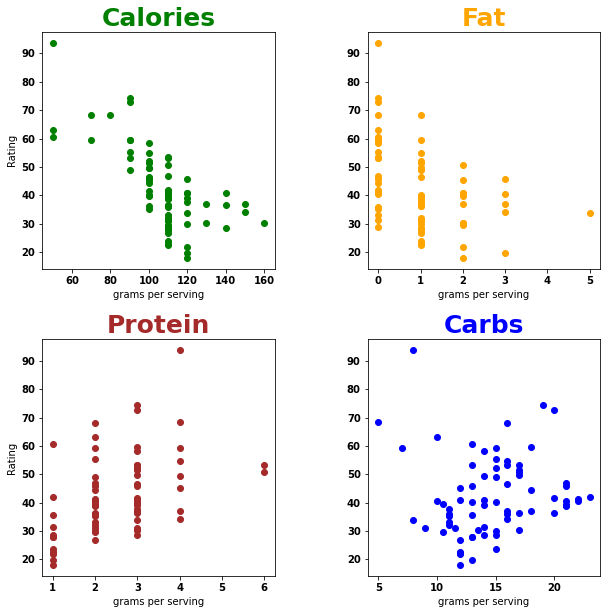

In [ ]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.4, hspace=0.3)

# fig.suptitle('Can calories and macronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
#              position=(0.5,1.0))

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="green")
ax1.set_title('Calories', fontdict=fontdict, color="green")
plt.ylabel('Rating')
plt.xlabel('grams per serving')


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Fat', fontdict=fontdict, color="orange")
plt.xlabel('grams per serving')

ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="brown")
ax3.set_title('Protein', fontdict=fontdict, color="brown")
plt.xlabel('grams per serving')
plt.ylabel('Rating')

ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="blue")
ax4.set_title("Carbs", fontdict=fontdict, color="blue")
plt.xlabel('grams per serving')

# Can micronutrients affect ratings?


Text(0.5, 0, 'grams per serving')

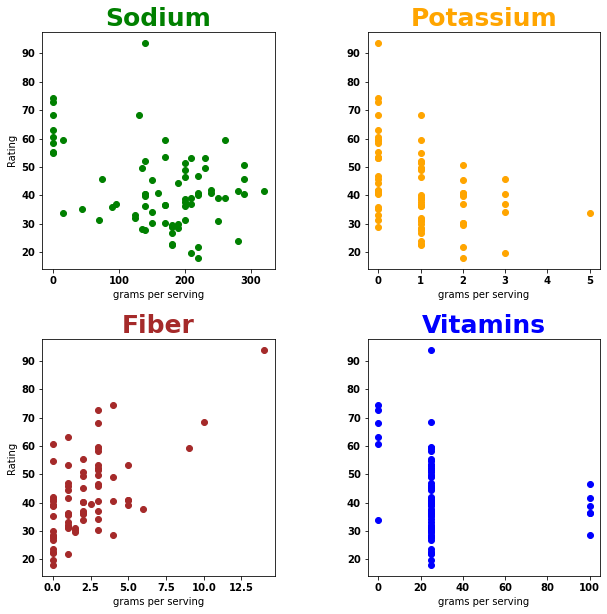

In [ ]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.4, hspace=0.3)

# fig.suptitle('Can micronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
#              position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="green")
ax1.set_title('Sodium', fontdict=fontdict, color="green")
plt.ylabel('Rating')
plt.xlabel('grams per serving')

ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Potassium', fontdict=fontdict, color="orange")
plt.xlabel('grams per serving')

ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="brown")
ax3.set_title('Fiber', fontdict=fontdict, color="brown")
plt.ylabel('Rating')
plt.xlabel('grams per serving')


ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="blue")
ax4.set_title("Vitamins", fontdict=fontdict, color="blue")
plt.xlabel('grams per serving')

Nitesh

Cereal Manufacturer Analysis:

1. Who are the major cereal manufacturers and what are their offerings?
2. What are their ratings?
3. What are their macro and micro nutrient stats?
4. Which manufacturer covers a wide variety of products and which manufactuere pertains to a niche market?


Who are the major cereal manufacturers and what are their offerings?


In [ ]:
mfr_map = {"A":"American Home Food Products","G":"General Mills","K":"Kelloggs","N":"Nabisco","P":"Post","Q":"Quaker Oats","R":"Ralston Purina"}
data_2 = data.copy()
data_2["mfr"] = data_2["mfr"].map(lambda x: mfr_map[x])
mfr_group = data_2.groupby('mfr')

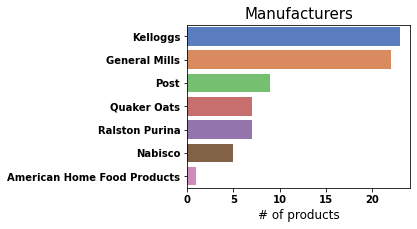

In [ ]:
plt.figure(figsize=(4,3))
mfr_group_rating = pd.DataFrame(mfr_group['rating'].count())
mfr_group_rating.reset_index(inplace=True)
mfr_group_rating = mfr_group_rating.sort_values("rating",ascending=False)
sns.set_palette(sns.color_palette("muted"))
sns.barplot(x=mfr_group_rating["rating"],y=mfr_group_rating["mfr"])
plt.xlabel("# of products",fontsize=12)
plt.ylabel("",fontsize=12)
plt.title("Manufacturers",fontsize=15)
plt.show()

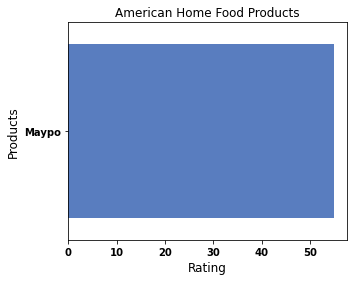

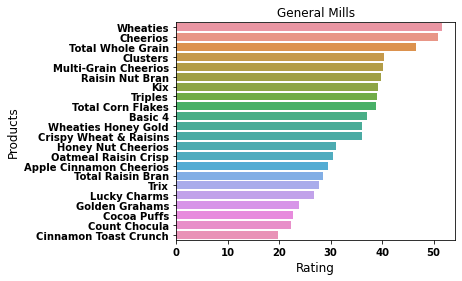

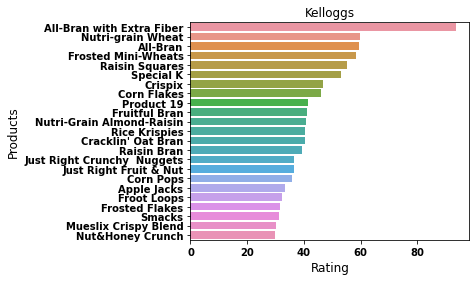

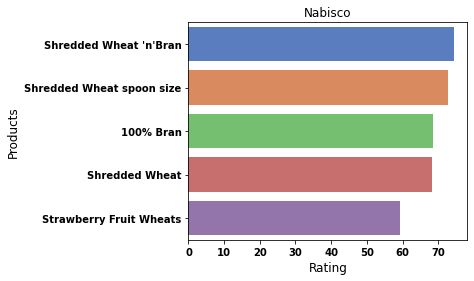

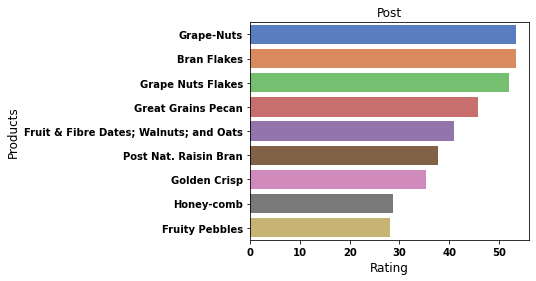

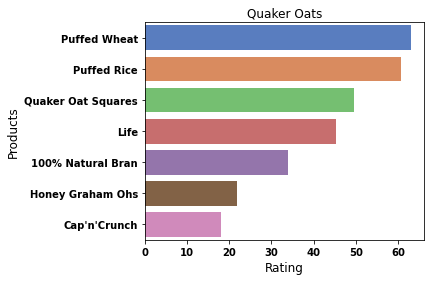

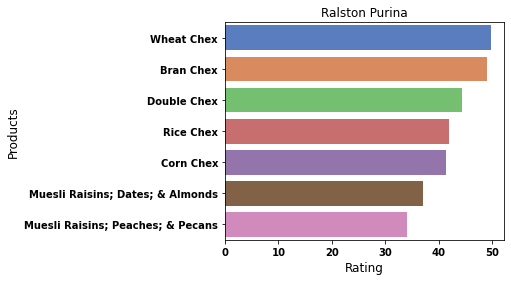

In [ ]:
for mfr_name, mfr_products in mfr_group:
  mfr_products = mfr_products.sort_values("rating", ascending=False)
  plt.figure(figsize=(5,4))
  sns.barplot(x=mfr_products["rating"],y=mfr_products["name"])
  plt.ylabel("Products",fontsize=12)
  plt.xlabel("Rating",fontsize=12)
  plt.title(mfr_name,fontsize=12)
  plt.show()

What are their ratings?

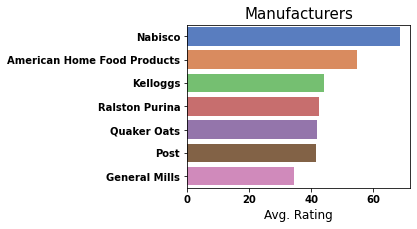

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


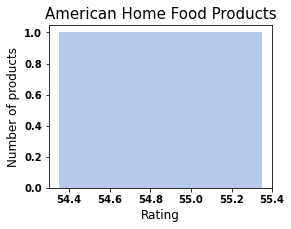

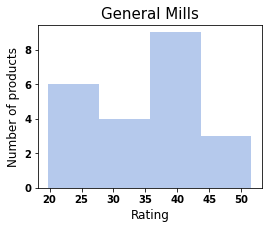

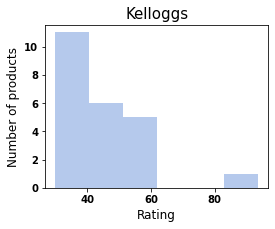

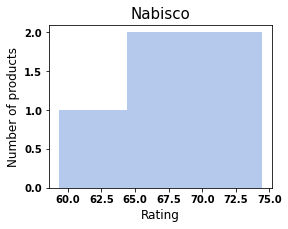

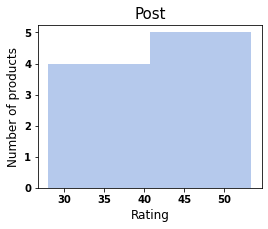

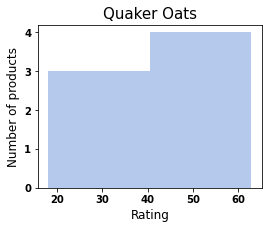

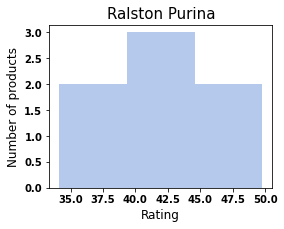

In [ ]:
plt.figure(figsize=(4,3))
mfr_group_rating = pd.DataFrame(mfr_group['rating'].mean())
mfr_group_rating.reset_index(inplace=True)
mfr_group_rating = mfr_group_rating.sort_values("rating",ascending=False)
sns.set_palette(sns.color_palette("muted"))
sns.barplot(x=mfr_group_rating["rating"],y=mfr_group_rating["mfr"])
plt.xlabel("Avg. Rating",fontsize=12)
plt.ylabel("",fontsize=12)
plt.title("Manufacturers",fontsize=15)
plt.show()

for mfr_name, mfr_products in mfr_group:
  plt.figure(figsize=(4,3))
  sns.distplot(mfr_products['rating'],  kde=False, label=mfr_name)
  plt.title(mfr_name, fontsize=15)
  plt.xlabel('Rating',fontsize=12)
  plt.ylabel('Number of products',fontsize=12)
  plt.show()

In [ ]:
data_2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,General Mills,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


What are their macro and micro nutrient stats?


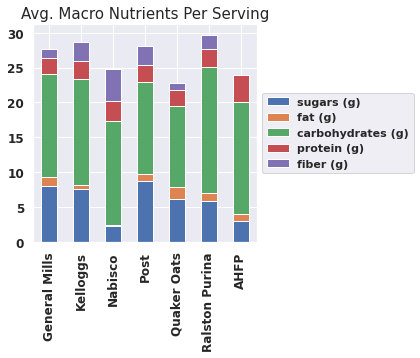

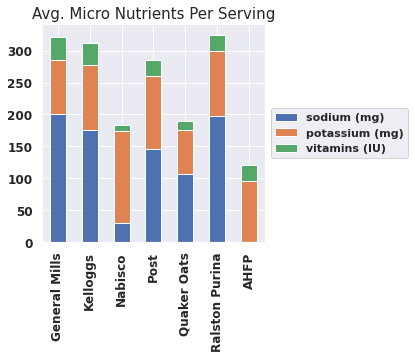

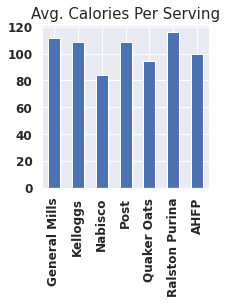

In [ ]:
sns.set()
mfr_group_mean = pd.DataFrame(mfr_group.mean())
mfr_group_mean["sugars (g)"] = mfr_group_mean["sugars"]
mfr_group_mean["fat (g)"] = mfr_group_mean["fat"]
mfr_group_mean["carbohydrates (g)"] = mfr_group_mean["carbo"]
mfr_group_mean["protein (g)"] = mfr_group_mean["protein"]
mfr_group_mean["sodium (mg)"] = mfr_group_mean["sodium"]
mfr_group_mean["potassium (mg)"] = mfr_group_mean["potass"]
mfr_group_mean["vitamins (IU)"] = mfr_group_mean["vitamins"].map(lambda x: x)
mfr_group_mean["fiber (g)"] = mfr_group_mean["fiber"]
mfr_group_mean["calories (Kcal)"] = mfr_group_mean["calories"].map(lambda x:x)
mfr_group_mean = mfr_group_mean.transpose()
mfr_group_mean["AHFP"] = mfr_group_mean["American Home Food Products"]
mfr_group_mean = mfr_group_mean.drop(columns=["American Home Food Products"])
mfr_group_mean_macro = mfr_group_mean.drop(["rating","cups","weight","shelf","vitamins","potass","sodium","calories","calories (Kcal)","sugars",
                                            "fat","carbo","protein","fiber","vitamins (IU)","potassium (mg)", "sodium (mg)"])

mfr_group_mean_macro[list(mfr_group_mean_macro.keys())].T.plot(kind='bar', stacked=True, figsize=(4,4), fontsize=12, legend=False)
plt.title("Avg. Macro Nutrients Per Serving", fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

mfr_group_mean_micro = mfr_group_mean.drop(["rating","cups","weight","shelf","vitamins","calories","calories (Kcal)","sugars",
                                            "fat","carbo","protein","fiber","sugars (g)","fat (g)","carbohydrates (g)","protein (g)",
                                            "fiber (g)","potass","sodium"])
mfr_group_mean_micro[list(mfr_group_mean_micro.keys())].T.plot(kind='bar', stacked=True, figsize=(4,4), fontsize=12, legend=False)
plt.title("Avg. Micro Nutrients Per Serving", fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

mfr_group_mean_calories = mfr_group_mean.drop(["rating","cups","weight","shelf","vitamins","calories","sugars",
                                            "fat","carbo","protein","fiber","sugars (g)","fat (g)","carbohydrates (g)","protein (g)",
                                            "fiber (g)","potass","sodium", "potassium (mg)", "sodium (mg)","vitamins (IU)" ])
mfr_group_mean_calories[list(mfr_group_mean_calories.keys())].T.plot(kind='bar', stacked=True, figsize=(3,3), fontsize=12, legend=False)
plt.title("Avg. Calories Per Serving", fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

Which manufacturer covers a wide variety of products and which manufacturer pertains to a niche market?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


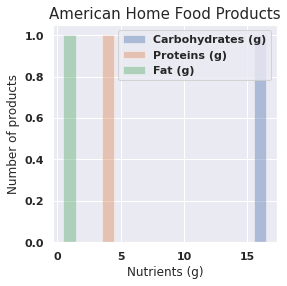

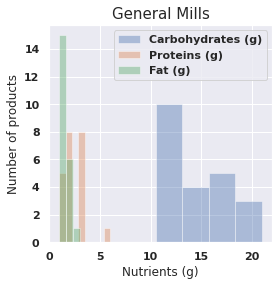

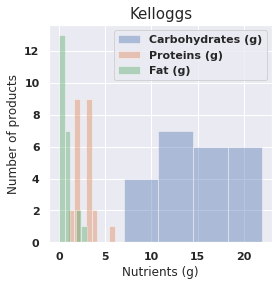

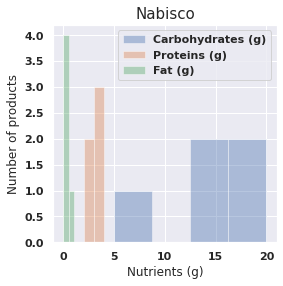

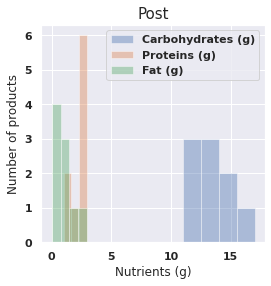

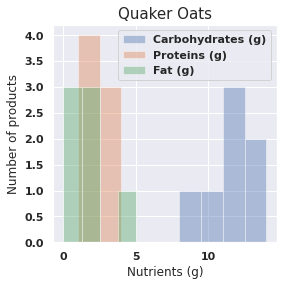

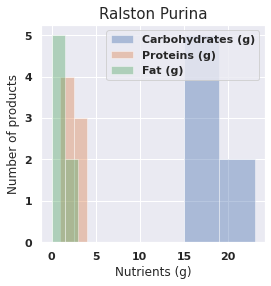

In [ ]:
for mfr_name, mfr_products in mfr_group:
  req_vars = ["carbo","protein","fat"]
  req_var_names = ["Carbohydrates (g)", "Proteins (g)", "Fat (g)"]
  plt.figure(figsize=(4,4))
  for i, req_var in enumerate(req_vars):
    sns.distplot(mfr_products[req_var],  kde=False, label=req_var_names[i])
  plt.legend()
  plt.title(mfr_name, fontsize=15)
  plt.xlabel('Nutrients (g)',fontsize=12)
  plt.ylabel('Number of products', fontsize=12)
  plt.show()

**What are the factors that made each cereal different from the others (A PCA Analysis)**

In [ ]:
%pip install pca

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=23fa75195576187c2a4a5f0bb592bea958c3cdc0d9215383546561db2ae50ddb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
from PCA import process_data_pca,fit_pca,pie_variance,gen_bi_plot, bi_plot,three_dimension_plot

In [ ]:
X,y = process_data_pca(df)

In [ ]:
print(X)

    calories  protein  fat  sodium  ...  sugars  potass  vitamins     rating
0         70        4    1     130  ...     6.0   280.0        25  68.402973
1        120        3    5      15  ...     8.0   135.0         0  33.983679
2         70        4    1     260  ...     5.0   320.0        25  59.425505
3         50        4    0     140  ...     0.0   330.0        25  93.704912
5        110        2    2     180  ...    10.0    70.0        25  29.509541
..       ...      ...  ...     ...  ...     ...     ...       ...        ...
72       110        2    1     250  ...     3.0    60.0        25  39.106174
73       110        1    1     140  ...    12.0    25.0        25  27.753301
74       100        3    1     230  ...     3.0   115.0        25  49.787445
75       100        3    1     200  ...     3.0   110.0        25  51.592193
76       110        2    1     200  ...     8.0    60.0        25  36.187559

[74 rows x 10 columns]


In [ ]:
X_s,X_t, model, top_feat, importance_feat = fit_pca(X)

feature importance
{'rating': 0.5125076308449632, 'fiber': 0.43264937030891165, 'calories': -0.3725724423890556, 'potass': 0.3571689129822908, 'sugars': -0.3200531256983763, 'protein': 0.3052850148598063, 'sodium': -0.1903801575035362, 'vitamins': -0.13726649927850568, 'fat': -0.13213099224477978, 'carbo': -0.12486935009921038}


In [ ]:
print("top features are")
print(top_feat)

top features are
['rating', 'fiber', 'calories', 'potass', 'sugars', 'protein']


5
5


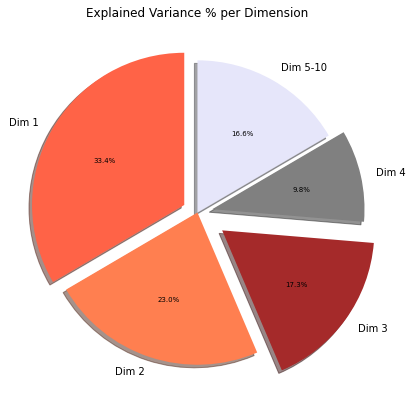

In [ ]:
pie_variance(model)

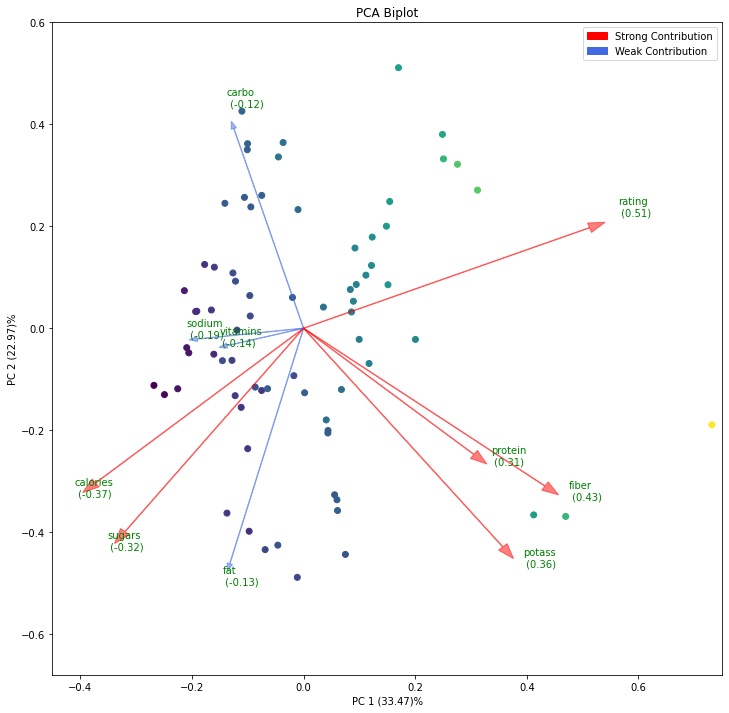

In [ ]:
bi_plot(X_t, model, top_feat, importance_feat, X,y)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


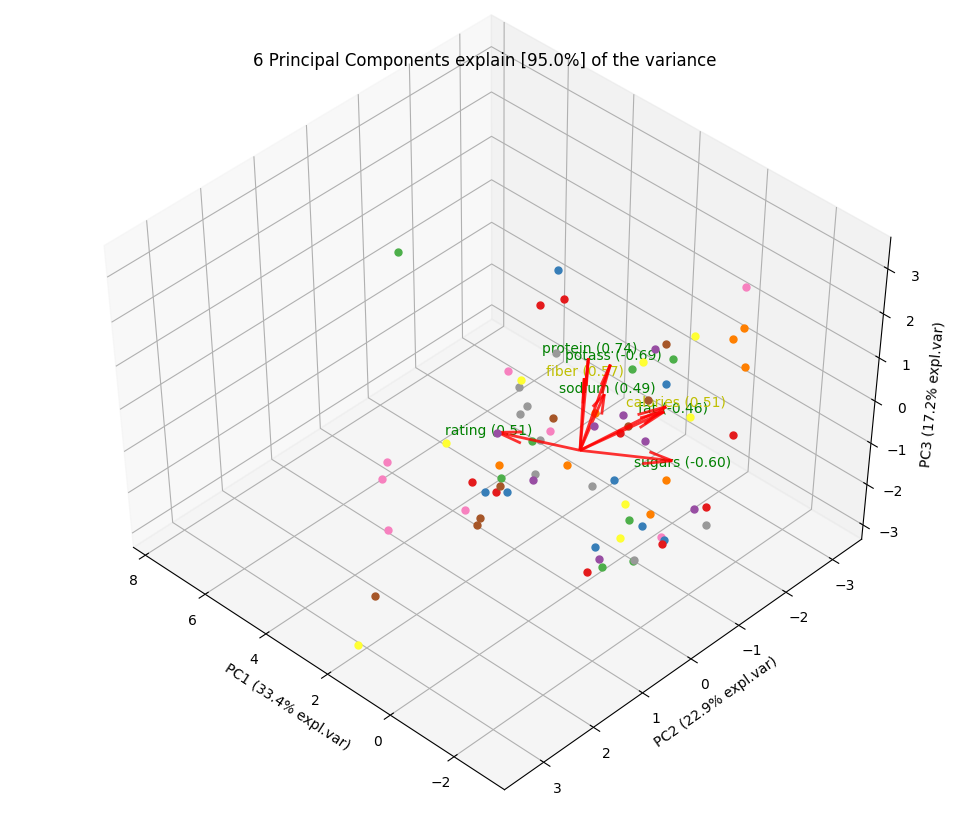

(<Figure size 1000x800 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f9c651c1b50>)

In [ ]:
three_dimension_plot(X_s, X)